# Chapter 11: Training Deep Neural Networks - Notebook Reproduksi Kode

Bab ini mengeksplorasi teknik-teknik untuk melatih jaringan saraf dalam (Deep Neural Networks)
secara efektif dan mengatasi tantangan seperti vanishing/exploding gradients.

Kita akan melihat:
- Vanishing/Exploding Gradients dan solusi (inisialisasi bobot, fungsi aktivasi).
- Batch Normalization.
- Reusing Pretrained Layers (Transfer Learning).
- Faster Optimizers (Momentum, Nesterov, AdaGrad, RMSProp, Adam).
- Learning Rate Scheduling.
- Regularisasi L1/L2, Dropout.

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
--- Vanishing/Exploding Gradients (Konseptual) ---
Masalah ini terjadi ketika gradien menjadi sangat kecil (vanishing) atau sangat besar (exploding)
saat backpropagasi melalui banyak lapisan, menghambat pelatihan jaringan dalam.


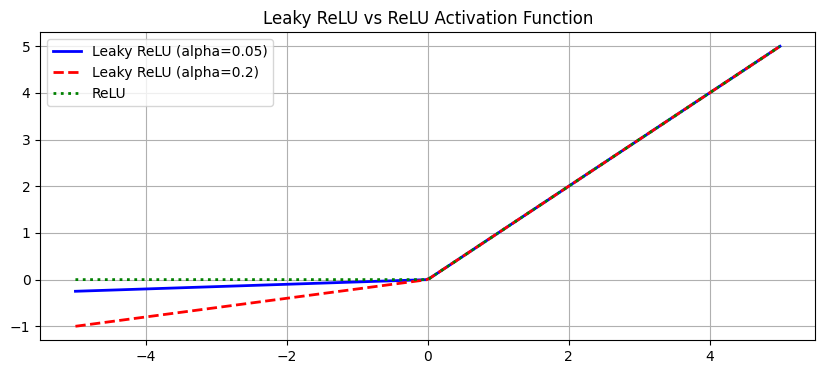


--- Batch Normalization ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 784)            │         3,136 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 271,346 (1.04 MB)

 Trainable params: 268,978 (1.03 MB)

 Non-trainable params: 2,368 (9.25 KB)


Melatih model dengan Batch Normalization...
Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7638 - loss: 0.6961 - val_accuracy: 0.8648 - val_loss: 0.3862
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8612 - loss: 0.3947 - val_accuracy: 0.8762 - val_loss: 0.3545
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8804 - loss: 0.3391 - val_accuracy: 0.8806 - val_loss: 0.3415
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8940 - loss: 0.3015 - val_accuracy: 0.8832 - val_loss: 0.3339
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9058 - loss: 0.2708 - val_accuracy: 0.8850 - val_loss: 0.3312
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9173 - loss: 0.2443 - val_accuracy: 0.8856 - val_loss: 0.3328
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9267 - loss: 0.2199 - val_accuracy: 0.8864 - val_loss: 0.3359
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━

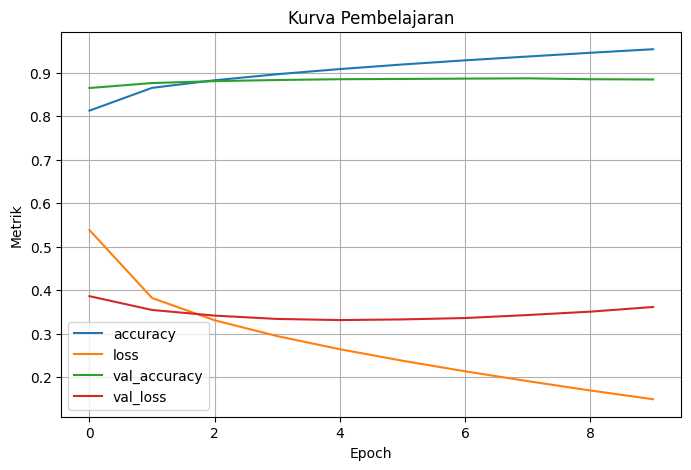


--- Gradient Clipping ---
Melatih model dengan Gradient Clipping...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6856 - loss: 0.9863 - val_accuracy: 0.8192 - val_loss: 0.5380
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8230 - loss: 0.5043 - val_accuracy: 0.8406 - val_loss: 0.4690
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8404 - loss: 0.4518 - val_accuracy: 0.8520 - val_loss: 0.4344
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8503 - loss: 0.4225 - val_accuracy: 0.8582 - val_loss: 0.4122
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8583 - loss: 0.4012 - val_accuracy: 0.8610 - val_loss: 0.3953
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8643 - loss: 0.3843 - val_accuracy: 0.8648 - val_loss: 0.3812
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8687 - loss: 0.3701 - val_accuracy: 0.8684 - val_loss: 0.3699
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8724 - loss: 0.3577 -

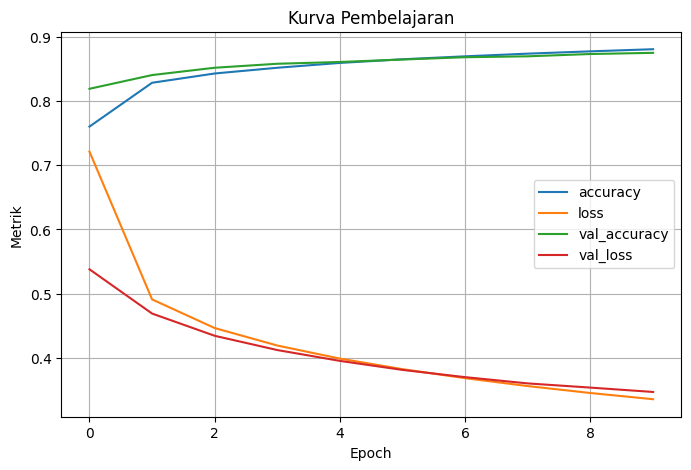


--- Reusing Pretrained Layers (Transfer Learning) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model dasar housing berhasil dilatih.

Freezing lapisan dasar...
Melatih model transfer (lapisan dasar beku)...
Epoch 1/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4762 - val_loss: 0.4013
Epoch 2/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4009 - val_loss: 0.3880
Epoch 3/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3898 - val_loss: 0.3956
Epoch 4/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3863 - val_loss: 0.4036
Epoch 5/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3842 - val_loss: 0.4100
Model transfer (lapisan beku) berhasil dilatih.

Unfreezing lapisan dasar untuk fine-tuning...
Melatih model transfer (fine-tuning)...
Epoch 1/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3822 - val_loss: 0.4079
Epoch 2/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3798 - val_loss: 0.4070
Epoch 3/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3785 - val_loss: 0.4066
Epoch 4/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3777 - val_l

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Momentum Optimizer berhasil dilatih.

Nesterov Accelerated Gradient:
Nesterov Accelerated Gradient berhasil dilatih.

AdaGrad:
AdaGrad berhasil dilatih.

RMSProp:
RMSProp berhasil dilatih.

Adam:
Adam Optimizer berhasil dilatih.

--- Learning Rate Scheduling ---

Power Scheduling:


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Power Scheduling berhasil dilatih.

Exponential Scheduling:
Exponential Scheduling berhasil dilatih.

Piecewise Constant Scheduling:
Piecewise Constant Scheduling berhasil dilatih.

Performance Scheduling (ReduceLROnPlateau):
Performance Scheduling berhasil dilatih.

--- Regularization (L1, L2, Dropout) ---

L1/L2 Regularization:
Model dengan L2 Regularization berhasil dilatih.

Dropout Regularization:
Model dengan Dropout Regularization berhasil dilatih.

--- Selesai Reproduksi Kode Chapter 11 ---


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing, load_iris # Untuk contoh
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Atur random seed untuk reproduksibilitas
np.random.seed(42)
tf.random.set_seed(42)

# Path untuk menyimpan gambar plot (untuk contoh buku)
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep_nn"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

# Fungsi pembantu untuk visualisasi
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    # plt.gca().set_ylim(0, 1) # Hanya jika metrik ada di rentang 0-1 (misal akurasi)
    plt.title("Kurva Pembelajaran")
    plt.xlabel("Epoch")
    plt.ylabel("Metrik")
    plt.show()

# Memuat Dataset Fashion MNIST (untuk demonstrasi klasifikasi)
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full_fashion, y_train_full_fashion), (X_test_fashion, y_test_fashion) = fashion_mnist.load_data()

X_valid_fashion, X_train_fashion = X_train_full_fashion[:5000] / 255.0, X_train_full_fashion[5000:] / 255.0
y_valid_fashion, y_train_fashion = y_train_full_fashion[:5000], y_train_full_fashion[5000:]
X_test_fashion = X_test_fashion / 255.0

class_names_fashion = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                       "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Memuat Dataset California Housing (untuk demonstrasi regresi)
housing = fetch_california_housing()
X_train_full_housing, X_test_housing, y_train_full_housing, y_test_housing = train_test_split(
    housing.data, housing.target, random_state=42)
X_train_housing, X_valid_housing, y_train_housing, y_valid_housing = train_test_split(
    X_train_full_housing, y_train_full_housing, random_state=42)

scaler_housing = StandardScaler()
X_train_scaled_housing = scaler_housing.fit_transform(X_train_housing)
X_valid_scaled_housing = scaler_housing.transform(X_valid_housing)
X_test_scaled_housing = scaler_housing.transform(X_test_housing)


# --- 1. Vanishing/Exploding Gradients Problems (Konseptual) ---
# Tidak ada kode langsung untuk memperagakan masalah ini secara langsung tanpa
# membangun model yang sangat dalam dan mengamati perilaku gradien/bobot.
# Solusi yang diimplementasikan di bagian selanjutnya.
print("--- Vanishing/Exploding Gradients (Konseptual) ---")
print("Masalah ini terjadi ketika gradien menjadi sangat kecil (vanishing) atau sangat besar (exploding)")
print("saat backpropagasi melalui banyak lapisan, menghambat pelatihan jaringan dalam.")

# Solusi: Glorot and He Initialization (sudah default di Keras Dense layers untuk relu/sigmoid)
# Solusi: Non-saturating Activation Functions (ReLU dan variannya)

# Contoh fungsi aktivasi
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha * z, z)

z = np.linspace(-5, 5, 200)
plt.figure(figsize=(10, 4))
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2, label="Leaky ReLU (alpha=0.05)")
plt.plot(z, leaky_relu(z, 0.2), "r--", linewidth=2, label="Leaky ReLU (alpha=0.2)")
plt.plot(z, np.maximum(0, z), "g:", linewidth=2, label="ReLU")
plt.grid(True)
plt.title("Leaky ReLU vs ReLU Activation Function")
plt.legend()
plt.show()

# Contoh ELU dan SELU (SELU membutuhkan inisialisasi LeCunNormal dan Scaled ReLU)
# ELU: keras.layers.Dense(..., activation="elu")
# SELU: keras.layers.Dense(..., activation="selu", kernel_initializer="lecun_normal")


# --- 2. Batch Normalization ---
# Menambahkan lapisan Batch Normalization (BN) setelah setiap lapisan tersembunyi
# (atau sebelum fungsi aktivasi) untuk mengatasi masalah gradien.

print("\n--- Batch Normalization ---")
model_bn = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(), # Batch Normalization layer pertama
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(), # Batch Normalization layer kedua
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(), # Batch Normalization layer ketiga
    keras.layers.Dense(10, activation="softmax")
])

model_bn.summary()

# Kompilasi dan Latih model dengan Batch Normalization
model_bn.compile(loss="sparse_categorical_crossentropy",
                 optimizer="sgd",
                 metrics=["accuracy"])

print("\nMelatih model dengan Batch Normalization...")
history_bn = model_bn.fit(X_train_fashion, y_train_fashion, epochs=10,
                          validation_data=(X_valid_fashion, y_valid_fashion))
print("Model dengan Batch Normalization berhasil dilatih.")

plot_learning_curves(history_bn)


# --- 3. Gradient Clipping ---
# Mencegah exploding gradients dengan memotong gradien di atas nilai ambang.
# Dilakukan di optimizer.

print("\n--- Gradient Clipping ---")
optimizer_gc = keras.optimizers.SGD(clipvalue=1.0) # Potong nilai gradien absolut maksimum ke 1.0
# optimizer_gc = keras.optimizers.SGD(clipnorm=1.0) # Potong norm gradien ke 1.0

model_gc = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model_gc.compile(loss="sparse_categorical_crossentropy",
                 optimizer=optimizer_gc,
                 metrics=["accuracy"])

print("Melatih model dengan Gradient Clipping...")
history_gc = model_gc.fit(X_train_fashion, y_train_fashion, epochs=10,
                          validation_data=(X_valid_fashion, y_valid_fashion))
print("Model dengan Gradient Clipping berhasil dilatih.")

plot_learning_curves(history_gc)


# --- 4. Reusing Pretrained Layers (Transfer Learning) ---
# Menggunakan model yang sudah dilatih sebagian.
# Contoh: Menggunakan model regresi California Housing yang sudah dilatih

print("\n--- Reusing Pretrained Layers (Transfer Learning) ---")
# Model dasar (base model) untuk regresi California Housing
model_base_housing = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train_scaled_housing.shape[1:]),
    keras.layers.Dense(10, activation="relu"), # Lapisan ekstra
    keras.layers.Dense(1)
])
model_base_housing.compile(loss="mse", optimizer="sgd")
history_base = model_base_housing.fit(X_train_scaled_housing, y_train_housing, epochs=5, verbose=0)
print("Model dasar housing berhasil dilatih.")

# Buat model baru yang menggunakan lapisan dari model yang sudah dilatih
model_transfer = keras.models.Sequential(model_base_housing.layers[:-1]) # Ambil semua kecuali output layer
model_transfer.add(keras.layers.Dense(1, activation="relu")) # Tambahkan output layer baru

# Freeze base model layers (optional, tetapi sering dilakukan di awal transfer learning)
# ini akan mencegah bobot lapisan dasar diperbarui selama pelatihan.
print("\nFreezing lapisan dasar...")
for layer in model_transfer.layers[:-1]:
    layer.trainable = False

# Kompilasi dan latih model transfer
# Penting: Setelah freezing/unfreezing, model harus di-compile ulang
optimizer_transfer = keras.optimizers.SGD(learning_rate=0.01)
model_transfer.compile(loss="mse", optimizer=optimizer_transfer)

print("Melatih model transfer (lapisan dasar beku)...")
history_transfer_frozen = model_transfer.fit(X_train_scaled_housing, y_train_housing, epochs=5,
                                             validation_data=(X_valid_scaled_housing, y_valid_housing))
print("Model transfer (lapisan beku) berhasil dilatih.")

# Unfreeze base model layers dan fine-tune
print("\nUnfreezing lapisan dasar untuk fine-tuning...")
for layer in model_transfer.layers[:-1]:
    layer.trainable = True

# Kompilasi ulang dengan learning rate yang lebih kecil untuk fine-tuning
optimizer_fine_tune = keras.optimizers.SGD(learning_rate=1e-4) # Learning rate sangat kecil
model_transfer.compile(loss="mse", optimizer=optimizer_fine_tune)

print("Melatih model transfer (fine-tuning)...")
history_transfer_unfrozen = model_transfer.fit(X_train_scaled_housing, y_train_housing, epochs=5,
                                               validation_data=(X_valid_scaled_housing, y_valid_housing))
print("Model transfer (fine-tuning) berhasil dilatih.")


# --- 5. Faster Optimizers ---

print("\n--- Faster Optimizers ---")
# Menggunakan dataset Fashion MNIST untuk demonstrasi

# a. Momentum Optimizer
print("\nMomentum Optimizer:")
optimizer_momentum = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model_momentum = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model_momentum.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer_momentum, metrics=["accuracy"])
history_momentum = model_momentum.fit(X_train_fashion, y_train_fashion, epochs=5, verbose=0)
print("Momentum Optimizer berhasil dilatih.")


# b. Nesterov Accelerated Gradient (NAG)
print("\nNesterov Accelerated Gradient:")
optimizer_nag = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model_nag = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model_nag.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer_nag, metrics=["accuracy"])
history_nag = model_nag.fit(X_train_fashion, y_train_fashion, epochs=5, verbose=0)
print("Nesterov Accelerated Gradient berhasil dilatih.")


# c. AdaGrad
print("\nAdaGrad:")
optimizer_adagrad = keras.optimizers.Adagrad(learning_rate=0.01)
model_adagrad = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model_adagrad.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer_adagrad, metrics=["accuracy"])
history_adagrad = model_adagrad.fit(X_train_fashion, y_train_fashion, epochs=5, verbose=0)
print("AdaGrad berhasil dilatih.")


# d. RMSProp
print("\nRMSProp:")
optimizer_rmsprop = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9) # rho adalah decay rate
model_rmsprop = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model_rmsprop.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer_rmsprop, metrics=["accuracy"])
history_rmsprop = model_rmsprop.fit(X_train_fashion, y_train_fashion, epochs=5, verbose=0)
print("RMSProp berhasil dilatih.")


# e. Adam (Adaptive Moment Estimation)
print("\nAdam:")
optimizer_adam = keras.optimizers.Adam(learning_rate=0.001)
model_adam = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model_adam.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer_adam, metrics=["accuracy"])
history_adam = model_adam.fit(X_train_fashion, y_train_fashion, epochs=5, verbose=0)
print("Adam Optimizer berhasil dilatih.")

# f. Adamax and Nadam (varian Adam)
# keras.optimizers.Adamax(...)
# keras.optimizers.Nadam(...)


# --- 6. Learning Rate Scheduling ---

print("\n--- Learning Rate Scheduling ---")
# a. Power Scheduling
# Learning rate = eta0 / (1 + t/d)^c
# Implemented by passing decay to SGD optimizer

print("\nPower Scheduling:")
optimizer_power_lr = keras.optimizers.SGD(learning_rate=0.01, decay=1e-4) # decay = 1/d
model_power_lr = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model_power_lr.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer_power_lr, metrics=["accuracy"])
history_power_lr = model_power_lr.fit(X_train_fashion, y_train_fashion, epochs=5, verbose=0)
print("Power Scheduling berhasil dilatih.")


# b. Exponential Scheduling
# Learning rate = eta0 * 0.1^(epoch / s)
# Implemented using keras.callbacks.LearningRateScheduler or custom callback

print("\nExponential Scheduling:")
def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch / 20) # Setiap 20 epoch, LR berkurang 10x

lr_scheduler_exp = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
optimizer_exp_lr = keras.optimizers.SGD(learning_rate=0.01) # LR awal diatur di scheduler
model_exp_lr = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model_exp_lr.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer_exp_lr, metrics=["accuracy"])
history_exp_lr = model_exp_lr.fit(X_train_fashion, y_train_fashion, epochs=5,
                                  callbacks=[lr_scheduler_exp], verbose=0)
print("Exponential Scheduling berhasil dilatih.")


# c. Piecewise Constant Scheduling
# Learning rate = 0.01 untuk epoch 0-5, 0.005 untuk 5-10, dst.

print("\nPiecewise Constant Scheduling:")
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 10:
        return 0.005
    else:
        return 0.001

lr_scheduler_pc = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)
optimizer_pc_lr = keras.optimizers.SGD(learning_rate=0.01)
model_pc_lr = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model_pc_lr.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer_pc_lr, metrics=["accuracy"])
history_pc_lr = model_pc_lr.fit(X_train_fashion, y_train_fashion, epochs=5,
                                callbacks=[lr_scheduler_pc], verbose=0)
print("Piecewise Constant Scheduling berhasil dilatih.")

# d. Performance Scheduling (ReduceLROnPlateau)
# Learning rate berkurang ketika metrik validasi berhenti meningkat.

print("\nPerformance Scheduling (ReduceLROnPlateau):")
reduce_lr_on_plateau = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5) # LR * 0.5 jika tidak ada peningkatan validasi selama 5 epoch
optimizer_plateau_lr = keras.optimizers.SGD(learning_rate=0.01)
model_plateau_lr = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model_plateau_lr.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer_plateau_lr, metrics=["accuracy"])
history_plateau_lr = model_plateau_lr.fit(X_train_fashion, y_train_fashion, epochs=5,
                                          validation_data=(X_valid_fashion, y_valid_fashion),
                                          callbacks=[reduce_lr_on_plateau], verbose=0)
print("Performance Scheduling berhasil dilatih.")

# e. tf.keras.optimizers.schedules (menggunakan learning rate object)
# Ini adalah cara modern untuk jadwal LR

# learning_rate_schedule_obj = keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=0.01, decay_steps=10000, decay_rate=0.9
# )
# optimizer_lr_obj = keras.optimizers.SGD(learning_rate=learning_rate_schedule_obj)
# model_lr_obj.compile(optimizer=optimizer_lr_obj, ...)


# --- 7. Regularization (L1, L2, Dropout) ---

print("\n--- Regularization (L1, L2, Dropout) ---")

# a. L1 and L2 Regularization (weight decay)
# Ditambahkan ke fungsi biaya.

print("\nL1/L2 Regularization:")
model_l2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01)), # L2 regularization
    keras.layers.Dense(100, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation="softmax", kernel_regularizer=keras.regularizers.l2(0.01))
])
model_l2.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
history_l2 = model_l2.fit(X_train_fashion, y_train_fashion, epochs=5, verbose=0)
print("Model dengan L2 Regularization berhasil dilatih.")


# b. Dropout
# Secara acak menonaktifkan neuron selama pelatihan.

print("\nDropout Regularization:")
model_dropout = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2), # Dropout layer pertama (20% neuron dinonaktifkan)
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dropout(rate=0.2), # Dropout layer kedua
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dropout(rate=0.2), # Dropout layer ketiga
    keras.layers.Dense(10, activation="softmax")
])
model_dropout.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
history_dropout = model_dropout.fit(X_train_fashion, y_train_fashion, epochs=5, verbose=0)
print("Model dengan Dropout Regularization berhasil dilatih.")

print("\n--- Selesai Reproduksi Kode Chapter 11 ---")
